In [2]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import colormaps
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

from pathlib import Path
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

(0.0, 3.0)

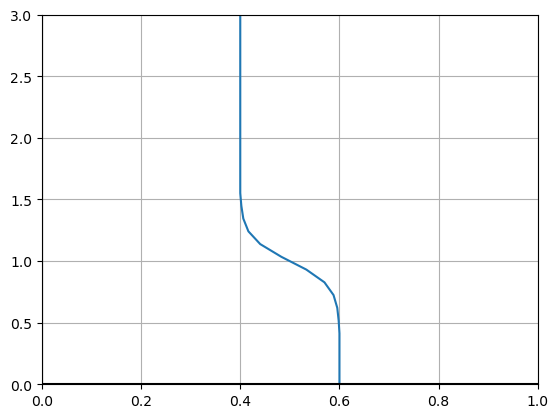

In [2]:
def compute_nb_distr(
                nb_max,
                nb_min,
                nb_max_depth,
                nb_min_depth,
                N,
                max_depth
            ):
    
    nb = np.zeros(N)
    z = np.linspace(0, max_depth, N)

    mid = (nb_max_depth + nb_min_depth) / 2
        
    nb = (1 / (1 + np.exp(-(z - mid) * 10 / (nb_min_depth - nb_max_depth)))) * (nb_min - nb_max) + nb_max
    
    nb[np.argwhere(z<=nb_max_depth)] = nb_max
    nb[np.argwhere(z>=nb_min_depth)] = nb_min
        
    return nb

z = np.linspace(0, 3, 30)

nb = compute_nb_distr(
    0.6,
    0.4,
    0.5,
    1.5,
    
    len(z),
    
    np.max(z),
)

# nb = (1 / (1 + np.exp(-(z - 0.5)*10)))

plt.plot(nb, z)
plt.grid()
plt.vlines(0, -5, 5, 'k')
plt.hlines(0, -5, 5, 'k')

plt.xlim((0, 1))
plt.ylim((0, 3))


[Text(1, 0, 'start'), Text(1, 1, 'end')]

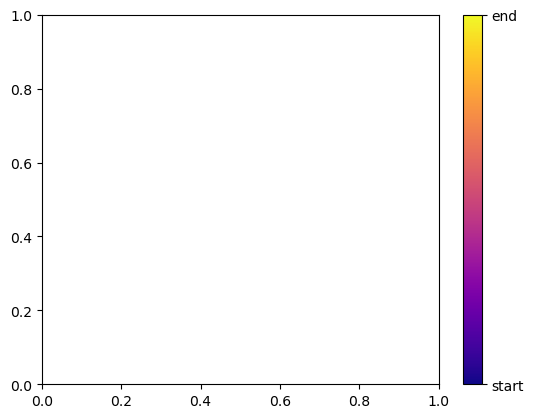

In [3]:
cmap = colormaps['plasma']

colors = cmap(np.linspace(0, 1, 100))

norm = Normalize()

sm = ScalarMappable(norm, cmap=cmap)



fig, ax = plt.subplots()


cbar = plt.colorbar(sm, ax=ax, ticks=[0, 1])

cbar.ax.set_yticklabels(['start', 'end'])

In [4]:
def count_nonzero_until_zero(matrix, dN=1):
    """Returns the number of grid points with a nonzero input, counted for each row from the lowest index until the first zero input.

    Args:
        matrix (np.array): a matrix
        dN (int): integer indicating the minimum amount of zeros needed to stop counting (from the top)

    Returns:
        result: number of grid points for each row before a zero input (-1 if no zeros in the entire row)
    """
    
    matrix = np.column_stack((matrix, np.zeros(matrix.shape[0])))
    
    indices = np.argmax(matrix == 0, axis=1)
    
    mask = (indices == matrix.shape[1]-1)
    
    indices[mask] = -1
    
    return indices



A = np.array([
    [1, 0, 0, 0],
    [0, 1, 0, 0],
    [0, 0, 0, 0],
    [1, 1, 1, 1],
    [1, 1, 0, 0],
])

count_nonzero_until_zero(A)

array([ 1,  0,  0, -1,  2], dtype=int64)

In [5]:
import numpy as np
from scipy.signal import convolve

def count_nonzero_until_n_zeros(matrix, dN=1):
    """Returns the number of grid points with a nonzero input, counted for each row from the lowest index until the first dN consecutive zero inputs.

    Args:
        matrix (np.array): a matrix
        dN (int): integer indicating the minimum amount of consecutive zeros needed to stop counting (from the top)

    Returns:
        result: number of grid points for each row before dN consecutive zero inputs (-1 if no dN consecutive zeros in the entire row)
    """
    
    # Create the convolution kernel to detect dN consecutive zeros
    kernel = np.ones(dN)
    
    # Convolve the matrix rows with the kernel
    convolved = convolve(matrix == 0, kernel[None, :], mode='same')
    
    # Find the index of the first occurrence of dN consecutive zeros in each row
    indices = np.argmax(convolved >= dN, axis=1)
    
    # If the first occurrence is at the end, we need to check if it's a valid detection
    valid_indices = convolved[np.arange(convolved.shape[0]), indices] >= dN
    indices[~valid_indices] = -1
    indices[valid_indices] -= dN//2
    
    return indices

# Test the function
A = np.array([
    [1, 2, 3, 4, 0, 0, 1, 2, 0, 3],
    [0, 0, 1, 2, 3, 4, 0, 0, 0, 0],
    [1, 2, 0, 3, 4, 5, 0, 0, 6, 7],
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
    [2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    [1, 0, 1, 0, 1, 0, 1, 0, 1, 0],
    [1, 2, 3, 4, 5, 6, 7, 8, 9, 0],
    [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 1, 2, 3, 4],
    [1, 1, 1, 1, 1, 1, 1, 1, 0, 0],
    [1, 2, 0, 0, 0, 0, 0, 0, 0, 1],
    [1, 2, 3, 4, 5, 6, 0, 0, 0, 0],
    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
    [1, 2, 3, 0, 4, 5, 6, 0, 7, 8],
    [0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
])

print(count_nonzero_until_n_zeros(A, dN=1))  # Example with dN=2
print(count_nonzero_until_n_zeros(A, dN=2))  # Example with dN=2
print(count_nonzero_until_n_zeros(A, dN=3))  # Example with dN=2
print(count_nonzero_until_n_zeros(A, dN=4))  # Example with dN=2



[ 4  0  2  7 -1  1  9  0  1  8  2  6  0  3  0]
[ 4  0  6  7 -1 -1 -1  0  1  8  2  6 -1 -1  0]
[-1  6 -1  7 -1 -1 -1  0  1 -1  2  6 -1 -1  7]
[-1  6 -1 -1 -1 -1 -1  0  1 -1  2  6 -1 -1 -1]


In [6]:
import os

In [7]:
path = os.path.join('hello', 'world')
print(path)

hello\world


In [8]:
with open('params.txt', 'r') as f:
    text = f.readlines()
    
hotstart_text = [
    "%% hotstart (during a storm, use the previous xbeach timestep as hotstart for current timestep)\n\n",
    "writehotstart: 1\n",
    "hotstart: 1\n",
    "\n"
    ]
    
for i, line in enumerate(text):
    if r"%% Output variables" in line:
        text = text[:i] + hotstart_text + text[i:]
    
with open('params.txt', 'w') as f:
    f.writelines(text)

In [15]:
fpath = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\test5\storm1.nc")

ds1 = xr.open_dataset(fpath)

fpath = Path(r"P:\11210070-usgscoop-202324-arcticxb\runs\test5\storm2.nc")

ds2 = xr.open_dataset(fpath)

print(ds1)

<xarray.Dataset> Size: 1MB
Dimensions:      (ny: 1, nx: 326, globaltime: 37)
Coordinates:
    globalx      (ny, nx) float64 3kB ...
    globaly      (ny, nx) float64 3kB ...
  * globaltime   (globaltime) float64 296B 0.0 100.0 200.0 ... 3.5e+03 3.6e+03
Dimensions without coordinates: ny, nx
Data variables: (12/15)
    _parameters  float64 8B ...
    x            (globaltime, ny, nx) float64 96kB ...
    y            (globaltime, ny, nx) float64 96kB ...
    zb           (globaltime, ny, nx) float64 96kB ...
    zs           (globaltime, ny, nx) float64 96kB ...
    H            (globaltime, ny, nx) float64 96kB ...
    ...           ...
    Sxx          (globaltime, ny, nx) float64 96kB ...
    Sxy          (globaltime, ny, nx) float64 96kB ...
    Syy          (globaltime, ny, nx) float64 96kB ...
    thetamean    (globaltime, ny, nx) float64 96kB ...
    vmag         (globaltime, ny, nx) float64 96kB ...
    urms         (globaltime, ny, nx) float64 96kB ...
Attributes:
    Conventio

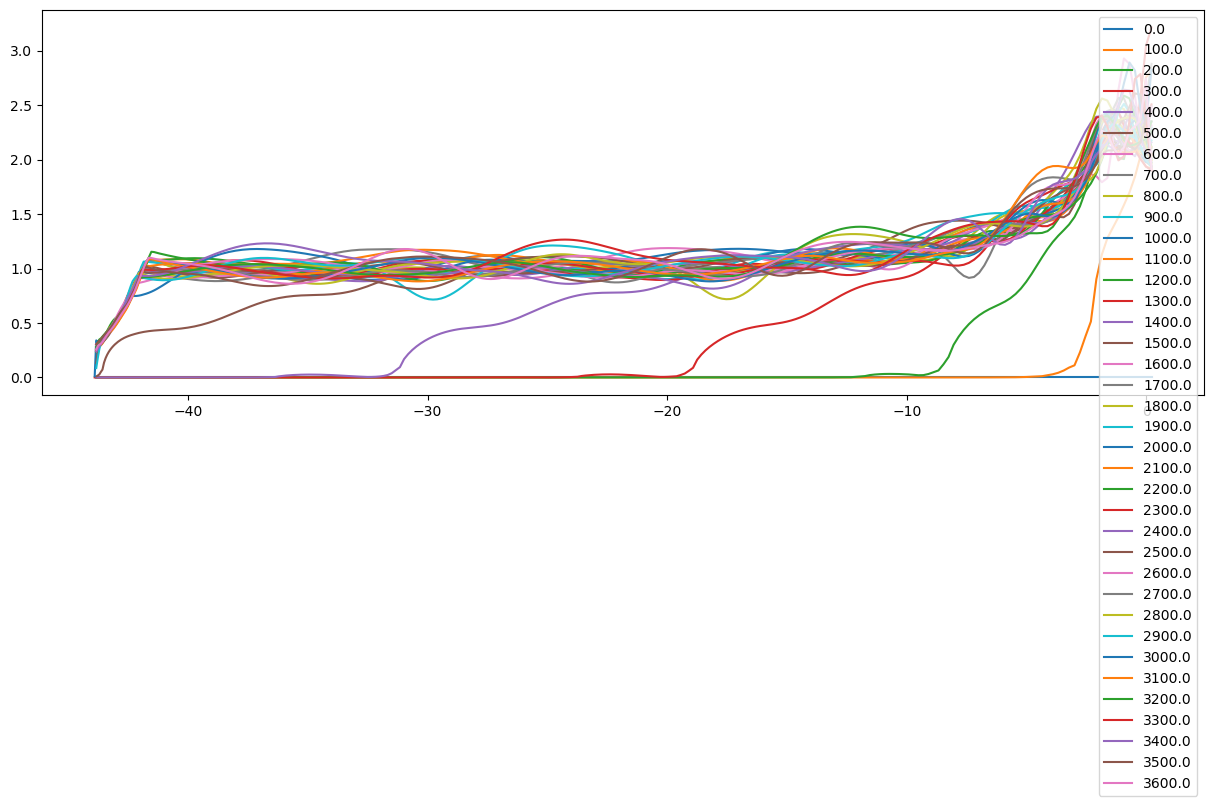

In [16]:
# ds0 = ds.sel(globaltime=0)
# ds1 = ds.sel(globaltime=3600)

# print(ds0.H.values.reshape(-1))
# print(ds1.H.values.reshape(-1))

fig, ax = plt.subplots(figsize=(15, 5))

for t in ds1.globaltime.values:
    ax.plot(ds1.globalx.values.reshape(-1), ds1.sel(globaltime=t).H.values.reshape(-1), label=t)

ax.legend()

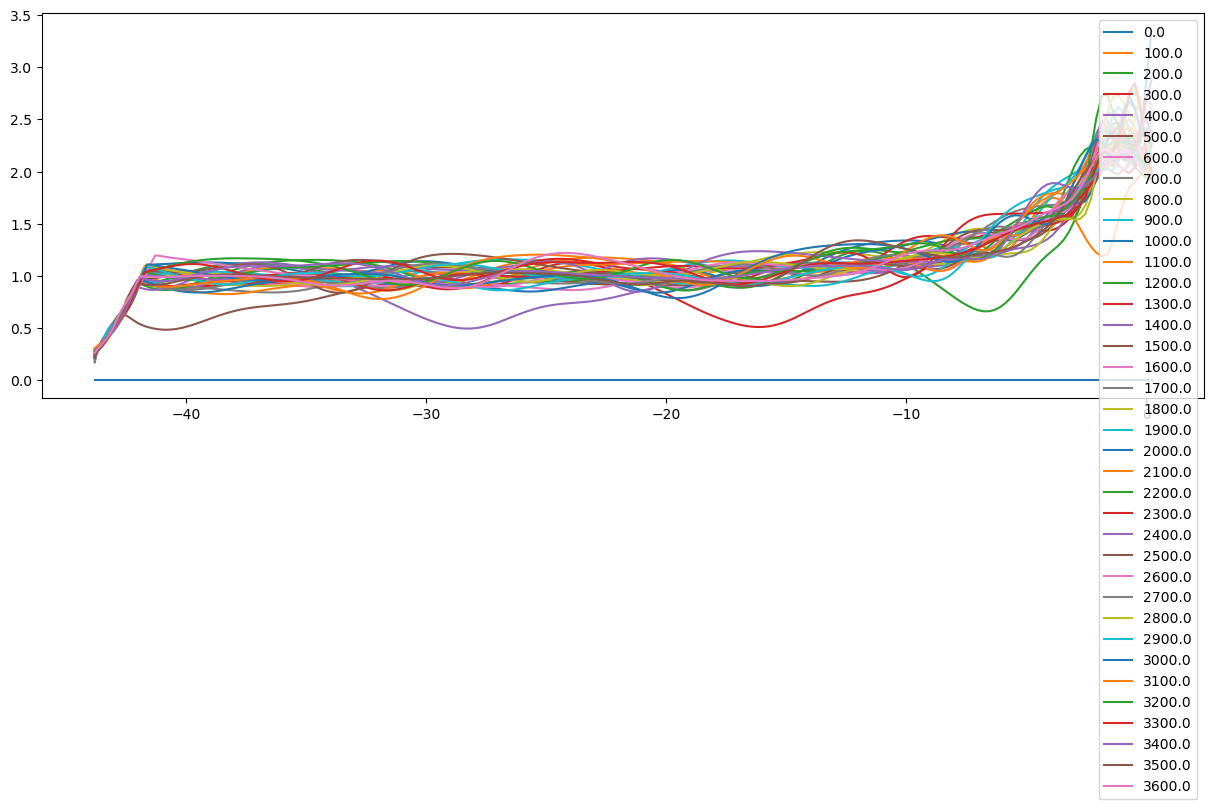

In [17]:
fig, ax = plt.subplots(figsize=(15, 5))

for t in ds2.globaltime.values:
    ax.plot(ds2.globalx.values.reshape(-1), ds2.sel(globaltime=t).H.values.reshape(-1), label=t)

ax.legend()

In [5]:
A = np.array([[0, 1, 2], [3, 4, 5]])

print(A)

A_flat = np.mean(A, axis=0)

print(A_flat)

[[0 1 2]
 [3 4 5]]
[1.5 2.5 3.5]
